<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Based off a four year analysis of SAT/ACT scores, has COVID-19 had an effect on metrics e.g. composite score or participation rate? If so, which metrics have been effected? This project focuses on what impact the pandemic has had on standardized testing. 

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

Before diving into my own analysis of the SAT & ACT scores, I would like to briefly provide a few considerations for context. My purpose for this context is to not only address the adversity students may have faced due to the pandemic such as school closures, health/safety concerns, financial burden, etc., and how these may have widened the achievement gap further, but also account for the resilence of the human spirit and the value of intrinsic motivation to overcome those obstacles. 

My problem statement looks to determine whether or not COVID-19 has had an impact on student's average performance on the SAT/ACT. A study conducted by ACT Research in August 2021, "...intended to give insight into several potential problems and challenges that high school students might experience and to assess how those are connected, if at all, to academic performance" (Schiel, pg. 1, 2021).

Although a large sample of nearly 4,000 students were surveyed, I feel the percentage of respondents is worth noting as this only represents "...12% of all students who were invited to participate" (Schiel, pg. 1, 2021). In this study, I examined two charts which analyzed categories of problems and challenges students faced and how those effects may have negatively impacted their academic performance broken into race/ethnicity, respectively. 

## Data 

 - [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
 - [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State

 - [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
 - [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
 
Additional data collected at links listed below:
 - https://soflotutors.com/blog/sat-scores-by-state/ (2020 data)
 
 - https://blog.prepscholar.com/average-sat-scores-by-state-most-recent (2021 data)
 
 - https://www.act.org/content/dam/act/unsecured/documents/2020/2020-Average-ACT-Scores-by-State.pdf
 
 - https://www.act.org/content/dam/act/unsecured/documents/2021/2021-Average-ACT-Scores-by-State.pdf



 

 

### Outside Research

Works Cited 
 - https://www.act.org/content/dam/act/unsecured/documents/pdfs/R2123-problems-challenges-affecting-hs-students-2021-08.pdf Accessed on: 3/19/2022
 - https://newsroom.collegeboard.org/sat-program-results-capture-impact-of-covid-on-class-of-2021 Accessed on: 3/19/2022

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def find_mean(value):
    return sum(value)/len(value)

find_mean([1, 2])

1.5

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
def find_std(arr):
    n = len(arr)
    mean = find_mean(arr)
    var = sum((i - mean)**2 for i in arr) / n
    std_dev = var ** 0.5
    return std_dev
find_std([1, 2])

0.5

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [4]:
def string_to_float(string):
    percent_out = string.replace('%', '')
    return float(percent_out)/100
string_to_float('50.5%')

0.505

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

## Data Import and Cleaning

In [6]:
#Creating an output folder to store my cleaned and merged dataframes
output = '../data/'
os.makedirs(output, exist_ok=True)

#Creating a files variable that contains workbooks with ACT & SAT scores from 2018-2021
files = os.listdir('../data')

In [7]:
def process_scores(file): 

    scores_df = pd.read_csv('../data/' + file)

    scores_df.columns = scores_df.columns.str.lower()
    
    try:
        scores_df['participation'] = (scores_df['participation']).apply(string_to_float)
    
    except:
        scores_df['participation'] = (scores_df['participation']).astype(float)/100
        
    return scores_df

In [8]:
def missing_values(df):
    return df.isnull().sum()

In [9]:
act_2018 = process_scores('act_2018.csv')
act_2018 = act_2018.drop(labels=[20], axis=0) # Removing the duplicate Maine value from dataframe.
act_2018.reset_index()
act_2018.head()

,state,participation,composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [10]:
act_2019 = process_scores('act_2019.csv')
act_2019.head()

,state,participation,composite
0,Alabama,1.00,18.9
1,Alaska,0.38,20.1
2,Arizona,0.73,19.0
3,Arkansas,1.00,19.3
4,California,0.23,22.6


In [11]:
act_bfc = pd.merge(
    act_2018, 
    act_2019, 
    how="inner", 
    on="state", 
    suffixes=['_act_18','_act_19']
)
act_bfc.head()

,state,participation_act_18,composite_act_18,participation_act_19,composite_act_19
0,Alabama,1.00,19.1,1.00,18.9
1,Alaska,0.33,20.8,0.38,20.1
2,Arizona,0.66,19.2,0.73,19.0
3,Arkansas,1.00,19.4,1.00,19.3
4,California,0.27,22.7,0.23,22.6


In [12]:
act_2020 = process_scores('act_2020.csv')
act_2020.tail()

,state,participation,composite
46,Virginia,0.19,24.4
47,Washington,0.20,22.9
48,West Virginia,0.38,20.9
49,Wisconsin,1.00,20.1
50,Wyoming,1.00,19.7


In [13]:
act_2021 = process_scores('act_2021.csv')
act_2021.tail()

,state,participation,composite
46,Virginia,0.09,25.5
47,Washington,0.07,23.6
48,West Virginia,0.30,20.8
49,Wisconsin,0.96,20.0
50,Wyoming,0.91,19.8


In [14]:
act_afc = pd.merge(
    act_2020, 
    act_2021, 
    how="left", 
    on="state", 
    suffixes=['_act_20','_act_21']
)
act_afc.tail()

,state,participation_act_20,composite_act_20,participation_act_21,composite_act_21
46,Virginia,0.19,24.4,0.09,25.5
47,Washington,0.20,22.9,NaN,NaN
48,West Virginia,0.38,20.9,0.30,20.8
49,Wisconsin,1.00,20.1,0.96,20.0
50,Wyoming,1.00,19.7,0.91,19.8


In [15]:
act_scores = pd.merge(
    act_bfc, 
    act_afc, 
    how="left", 
    on="state", 
)
act_scores.tail()

,state,participation_act_18,composite_act_18,participation_act_19,composite_act_19,participation_act_20,composite_act_20,participation_act_21,composite_act_21
46,Virginia,0.24,23.9,0.21,24.0,0.19,24.4,0.09,25.5
47,Washington,0.24,22.2,0.24,22.1,NaN,NaN,NaN,NaN
48,West Virginia,0.65,20.3,0.49,20.8,0.38,20.9,0.30,20.8
49,Wisconsin,1.00,20.5,1.00,20.3,1.00,20.1,0.96,20.0
50,Wyoming,1.00,20.0,1.00,19.8,1.00,19.7,0.91,19.8


In [16]:
nan_sub = {"participation_act_20": .20, "composite_act_20": 22.9, "participation_act_21": 0.7, "composite_act_21": 23.6}
act_scores = act_scores.fillna(value=nan_sub) #Filling in NaN values with the appropriate values that were lost due to merge
act_scores.tail()

,state,participation_act_18,composite_act_18,participation_act_19,composite_act_19,participation_act_20,composite_act_20,participation_act_21,composite_act_21
46,Virginia,0.24,23.9,0.21,24.0,0.19,24.4,0.09,25.5
47,Washington,0.24,22.2,0.24,22.1,0.20,22.9,0.70,23.6
48,West Virginia,0.65,20.3,0.49,20.8,0.38,20.9,0.30,20.8
49,Wisconsin,1.00,20.5,1.00,20.3,1.00,20.1,0.96,20.0
50,Wyoming,1.00,20.0,1.00,19.8,1.00,19.7,0.91,19.8


In [18]:
missing_values(act_scores)

state                   0
participation_act_18    0
composite_act_18        0
participation_act_19    0
composite_act_19        0
participation_act_20    0
composite_act_20        0
participation_act_21    0
composite_act_21        0
dtype: int64

In [19]:
act_scores.dtypes

state                    object
participation_act_18    float64
composite_act_18        float64
participation_act_19    float64
composite_act_19        float64
participation_act_20    float64
composite_act_20        float64
participation_act_21    float64
composite_act_21        float64
dtype: object

In [20]:
sat_2018 = process_scores('sat_2018.csv')
sat_2018.head()

,state,participation,ebrw,math,composite
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [21]:
sat_2019 = pd.read_csv('../data/sat_2019.csv')
sat_2019
sat_2019 = sat_2019.drop(labels=[39, 47], axis=0) #Removing Puerto Rico & the US Virgin Islands from dataframe
sat_2019
sat_2019.columns = sat_2019.columns.str.lower()
sat_2019['participation'] = (sat_2019['participation']).astype(float)
sat_2019.reset_index()
sat_2019.head()

,state,participation,ebrw,math,composite
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065


In [22]:
sat_bfc = pd.merge(
    sat_2018, 
    sat_2019, 
    how="inner", 
    on="state", 
    suffixes=['_sat_18','_sat_19']
)
sat_bfc.head()

,state,participation_sat_18,ebrw_sat_18,math_sat_18,composite_sat_18,participation_sat_19,ebrw_sat_19,math_sat_19,composite_sat_19
0,Alabama,0.06,595,571,1166,0.07,583,560,1143
1,Alaska,0.43,562,544,1106,0.41,556,541,1097
2,Arizona,0.29,577,572,1149,0.31,569,565,1134
3,Arkansas,0.05,592,576,1169,0.06,582,559,1141
4,California,0.60,540,536,1076,0.63,534,531,1065


In [23]:
sat_2020 = process_scores('sat_2020.csv')
sat_2020.head()

,state,participation,ebrw,math,composite
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065


In [24]:
sat_2021 = process_scores('sat_2021.csv')
sat_2021.head()

,state,participation,ebrw,math,composite
0,Alabama,0.03,591,568,1159
1,Alaska,0.23,567,553,1119
2,Arizona,0.11,592,589,1181
3,Arkansas,0.02,610,584,1194
4,California,0.24,527,530,1057


In [25]:
sat_afc = pd.merge(
    sat_2020, 
    sat_2021, 
    how="inner", 
    on="state", 
    suffixes=['_sat_20','_sat_21']
)
sat_afc.head()

,state,participation_sat_20,ebrw,math,composite_sat_20,participation_sat_21,ebrw,math,composite_sat_21
0,Alabama,0.07,583,560,1143,0.03,591,568,1159
1,Alaska,0.41,556,541,1097,0.23,567,553,1119
2,Arizona,0.31,569,565,1134,0.11,592,589,1181
3,Arkansas,0.06,582,559,1141,0.02,610,584,1194
4,California,0.63,534,531,1065,0.24,527,530,1057


In [26]:
sat_scores = pd.merge(
    sat_bfc, 
    sat_afc, 
    how="inner", 
    on="state", 
)
sat_scores.head()

,state,participation_sat_18,ebrw_sat_18,math_sat_18,composite_sat_18,participation_sat_19,ebrw_sat_19,math_sat_19,composite_sat_19,participation_sat_20,ebrw,math,composite_sat_20,participation_sat_21,ebrw,math,composite_sat_21
0,Alabama,0.06,595,571,1166,0.07,583,560,1143,0.07,583,560,1143,0.03,591,568,1159
1,Alaska,0.43,562,544,1106,0.41,556,541,1097,0.41,556,541,1097,0.23,567,553,1119
2,Arizona,0.29,577,572,1149,0.31,569,565,1134,0.31,569,565,1134,0.11,592,589,1181
3,Arkansas,0.05,592,576,1169,0.06,582,559,1141,0.06,582,559,1141,0.02,610,584,1194
4,California,0.60,540,536,1076,0.63,534,531,1065,0.63,534,531,1065,0.24,527,530,1057


In [27]:
missing_values(sat_scores)

state                   0
participation_sat_18    0
ebrw_sat_18             0
math_sat_18             0
composite_sat_18        0
participation_sat_19    0
ebrw_sat_19             0
math_sat_19             0
composite_sat_19        0
participation_sat_20    0
ebrw                    0
math                    0
composite_sat_20        0
participation_sat_21    0
ebrw                    0
math                    0
composite_sat_21        0
dtype: int64

In [28]:
sat_scores.dtypes

state                    object
participation_sat_18    float64
ebrw_sat_18               int64
math_sat_18               int64
composite_sat_18          int64
participation_sat_19    float64
ebrw_sat_19               int64
math_sat_19               int64
composite_sat_19          int64
participation_sat_20    float64
ebrw                      int64
math                      int64
composite_sat_20          int64
participation_sat_21    float64
ebrw                      int64
math                      int64
composite_sat_21          int64
dtype: object

In [29]:
sat_scores = sat_scores.drop(columns=['ebrw_sat_18', 'math_sat_18', 'ebrw_sat_19', 'math_sat_19', 'ebrw', 'math', 'ebrw ', 'math '])
sat_scores.head()

,state,participation_sat_18,composite_sat_18,participation_sat_19,composite_sat_19,participation_sat_20,composite_sat_20,participation_sat_21,composite_sat_21
0,Alabama,0.06,1166,0.07,1143,0.07,1143,0.03,1159
1,Alaska,0.43,1106,0.41,1097,0.41,1097,0.23,1119
2,Arizona,0.29,1149,0.31,1134,0.31,1134,0.11,1181
3,Arkansas,0.05,1169,0.06,1141,0.06,1141,0.02,1194
4,California,0.60,1076,0.63,1065,0.63,1065,0.24,1057


In [30]:
sat_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_sat_18,51.0,0.457451,0.373143,0.02,0.045,0.52,0.775,1.00
composite_sat_18,51.0,1120.019608,94.155083,977.00,1057.500,1098.00,1204.000,1298.00
participation_sat_19,51.0,0.490588,0.387476,0.02,0.055,0.54,0.820,1.00
composite_sat_19,51.0,1113.078431,97.197910,943.00,1038.000,1097.00,1210.000,1284.00
participation_sat_20,51.0,0.490588,0.387476,0.02,0.055,0.54,0.820,1.00
composite_sat_20,51.0,1113.921569,98.481235,943.00,1038.000,1097.00,1210.000,1284.00
participation_sat_21,51.0,0.310392,0.289551,0.01,0.030,0.26,0.480,0.96
composite_sat_21,51.0,1122.294118,87.523550,984.00,1052.500,1123.00,1204.500,1263.00


In [31]:
act_sat_scores = pd.merge(
    act_scores, 
    sat_scores, 
    how="left", 
    on="state", 
)
act_sat_scores.head()

,state,participation_act_18,composite_act_18,participation_act_19,composite_act_19,participation_act_20,composite_act_20,participation_act_21,composite_act_21,participation_sat_18,composite_sat_18,participation_sat_19,composite_sat_19,participation_sat_20,composite_sat_20,participation_sat_21,composite_sat_21
0,Alabama,1.00,19.1,1.00,18.9,1.00,18.8,1.00,18.7,0.06,1166,0.07,1143,0.07,1143,0.03,1159
1,Alaska,0.33,20.8,0.38,20.1,0.33,20.1,0.16,20.6,0.43,1106,0.41,1097,0.41,1097,0.23,1119
2,Arizona,0.66,19.2,0.73,19.0,0.71,19.1,0.35,19.8,0.29,1149,0.31,1134,0.31,1134,0.11,1181
3,Arkansas,1.00,19.4,1.00,19.3,1.00,19.0,0.99,19.0,0.05,1169,0.06,1141,0.06,1141,0.02,1194
4,California,0.27,22.7,0.23,22.6,0.19,23.3,0.05,26.1,0.60,1076,0.63,1065,0.63,1065,0.24,1057


In [32]:
file_name = 'act_scores.csv'
file_path = os.path.join(output, file_name)
act_scores_merged = act_scores.to_csv(file_path)

In [33]:
file_name = 'sat_scores.csv'
file_path = os.path.join(output, file_name)
sat_scores_merged = sat_scores.to_csv(file_path)

In [34]:
file_name = 'act_sat_scores.csv'
file_path = os.path.join(output, file_name)
act_sat_scores_merged = act_sat_scores.to_csv(file_path)

## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|act_scores|The state where test score participation and average score data was collected. Alphabetically sorted.| 
|participation_act_18|float64|act_scores|Participation percentage rate of students in 2018 from corresponding state.|
|composite_act_18|float64|act_scores|Average score of ACT test calculated from Math, Reading, English, and Science subtests in 2018. Range of scores from 1 to 36.|
|participation_act_19|float64|act_scores|Participation percentage rate of students in 2019 from corresponding state.|
|composite_act_19|float64|act_scores|Average score of ACT test calculated from Math, Reading, English, and Science subtests in 2019. Range of scores from 1 to 36.|
|participation_act_20|float64|act_scores|Participation percentage rate of students in 2020 from corresponding state.|
|composite_act_20|float64|act_scores|Average score of ACT test calculated from Math, Reading, English, and Science subtests in 2020. Range of scores from 1 to 36.|
|participation_act_21|float64|act_scores|Participation percentage rate of students in 2021 from corresponding state.|
|composite_act_21|float64|act_scores|Average score of ACT test calculated from Math, Reading, English, and Science subtests in 2021. Range of scores from 1 to 36.|
|state|object|sat_scores|The state where test score participation rate and average score data was collected. Alphabetically sorted.|
|participation_sat_18|float64|sat_scores|Participation percentage rate of students in 2018 from corresponding state.|
|composite_sat_18|int64|sat_scores|Average score of SAT test calculated from EBRW (Evidence-Based Reading & Writing) & Math subtests in 2018. Range of scores from 400 to 1600.|
|participation_sat_19|float64|sat_scores|Participation percentage rate of students in 2019 from corresponding state.|
|composite_sat_19|int64|sat_scores|Average score of SAT test calculated from EBRW (Evidence-Based Reading & Writing) & Math subtests in 2019. Range of scores from 400 to 1600.|
|participation_sat_20|float64|sat_scores|Participation percentage rate of students in 2020 from corresponding state.|
|composite_sat_20|int64|sat_scores|Average score of SAT test calculated from EBRW (Evidence-Based Reading & Writing) & Math subtests in 2020. Range of scores from 400 to 1600.|
|participation_sat_21|float64|sat_scores|Participation percentage rate of students in 2021 from corresponding state.|
|composite_sat_21|int64|sat_scores|Average score of SAT test calculated from EBRW (Evidence-Based Reading & Writing) & Math subtests in 2021. Range of scores from 400 to 1600.|

## Exploratory Data Analysis

In [35]:
num_cols = act_sat_scores.select_dtypes(np.number).columns

In [36]:
std = {col_name: find_std(act_sat_scores[col_name]) for col_name in num_cols}
std

{'participation_act_18': 0.33701735820410317,
 'composite_act_18': 2.090779082141178,
 'participation_act_19': 0.3417582373703047,
 'composite_act_19': 2.172901153595978,
 'participation_act_20': 0.3529164479354506,
 'composite_act_20': 2.4317630932386956,
 'participation_act_21': 0.36355172637056804,
 'composite_act_21': 2.8819140655606708,
 'participation_sat_18': 0.3694661922353942,
 'composite_sat_18': 93.22742384464433,
 'participation_sat_19': 0.3836584048685726,
 'composite_sat_19': 96.24027185617864,
 'participation_sat_20': 0.3836584048685726,
 'composite_sat_20': 97.51095325850602,
 'participation_sat_21': 0.2866983164309961,
 'composite_sat_21': 86.66122775942233}

## Was there a significant change in the mean score of ACT or SAT tests from 2018-2020? Participation rate?

In [37]:
national_act_sat = act_sat_scores.describe().T
national_act_sat[['mean', 'min', '50%', 'max']]

,mean,min,50%,max
participation_act_18,0.617255,0.07,0.66,1.00
composite_act_18,21.496078,17.70,21.30,25.60
participation_act_19,0.586667,0.06,0.54,1.00
composite_act_19,21.464706,17.90,21.10,25.50
participation_act_20,0.569020,0.05,0.46,1.00
composite_act_20,21.547059,17.90,20.90,26.00
participation_act_21,0.457843,0.02,0.34,1.00
composite_act_21,22.007843,17.80,20.70,27.60
participation_sat_18,0.457451,0.02,0.52,1.00
composite_sat_18,1120.019608,977.00,1098.00,1298.00


No. When looking at a general overview of the mean scores of ACT & SAT across all 50 states, there is not a noticeable change. However, the mean participation rate of both ACT & SAT saw around a 15% drop from 2018 to 2021, and the median participation rate dropped by 50% for ACT & SAT. 

## Did state(s) with the lowest participation rate score above the national average for the ACT?

In [38]:
act_part = act_scores
act_part[['state','participation_act_18', 'composite_act_18']].sort_values(by='participation_act_18', ascending=True).head()

,state,participation_act_18,composite_act_18
19,Maine,0.07,24.0
39,Rhode Island,0.15,24.2
29,New Hampshire,0.16,25.1
7,Delaware,0.17,23.8
38,Pennsylvania,0.20,23.5


In [39]:
act_part = act_scores
act_part[['state','participation_act_19', 'composite_act_19']].sort_values(by='participation_act_19', ascending=True).head()

,state,participation_act_19,composite_act_19
19,Maine,0.06,24.3
39,Rhode Island,0.12,24.7
7,Delaware,0.13,24.1
29,New Hampshire,0.14,25.0
38,Pennsylvania,0.17,23.6


In [40]:
act_part = act_scores
act_part[['state','participation_act_20', 'composite_act_20']].sort_values(by='participation_act_20', ascending=True).head()

,state,participation_act_20,composite_act_20
19,Maine,0.05,24.9
39,Rhode Island,0.11,24.8
7,Delaware,0.11,24.2
29,New Hampshire,0.12,25.7
38,Pennsylvania,0.15,23.7


In [41]:
act_part = act_scores
act_part[['state','participation_act_21', 'composite_act_21']].sort_values(by='participation_act_21', ascending=True).head()

,state,participation_act_21,composite_act_21
19,Maine,0.02,25.6
29,New Hampshire,0.04,26.6
45,Vermont,0.04,24.7
39,Rhode Island,0.04,25.8
4,California,0.05,26.1


Yes, the lowest participation rate for the ACT consistently featured states in the northeast; however, their average scores were at least 3 to 4 points above the national mean. These low participation rates aren't necessarily due to the pandemic but more likely an educational policy as the SAT or other state standardized test is required in place of the ACT. This leads me to consider the intrinsic motivation of taking an additional standardized test is to increase chances of college admission. 

## Did state(s) with the highest participation rate score below the national average for the ACT?

In [106]:
act_part = act_scores
act_part[['state','participation_act_18', 'composite_act_18']].sort_values(by='participation_act_18', ascending=False).head(10)

,state,participation_act_18,composite_act_18
0,Alabama,1.0,19.1
17,Kentucky,1.0,20.2
49,Wisconsin,1.0,20.5
44,Utah,1.0,20.4
42,Tennessee,1.0,19.6
40,South Carolina,1.0,18.3
36,Oklahoma,1.0,19.3
35,Ohio,1.0,20.3
33,North Carolina,1.0,19.1
28,Nevada,1.0,17.7


In [43]:
act_part = act_scores
act_part[['state','participation_act_19', 'composite_act_19']].sort_values(by='participation_act_19', ascending=False).head(10)

,state,participation_act_19,composite_act_19
0,Alabama,1.0,18.9
17,Kentucky,1.0,19.8
49,Wisconsin,1.0,20.3
44,Utah,1.0,20.3
42,Tennessee,1.0,19.4
36,Oklahoma,1.0,18.9
35,Ohio,1.0,20.0
33,North Carolina,1.0,19.0
28,Nevada,1.0,17.9
27,Nebraska,1.0,20.0


In [44]:
act_part = act_scores
act_part[['state','participation_act_20', 'composite_act_20']].sort_values(by='participation_act_20', ascending=False).head(10)

,state,participation_act_20,composite_act_20
0,Alabama,1.0,18.8
17,Kentucky,1.0,19.5
49,Wisconsin,1.0,20.1
44,Utah,1.0,20.2
42,Tennessee,1.0,19.3
36,Oklahoma,1.0,18.7
35,Ohio,1.0,19.9
33,North Carolina,1.0,18.8
28,Nevada,1.0,17.9
27,Nebraska,1.0,19.9


In [45]:
act_part = act_scores
act_part[['state','participation_act_21', 'composite_act_21']].sort_values(by='participation_act_21', ascending=False).head(10)

,state,participation_act_21,composite_act_21
0,Alabama,1.00,18.7
17,Kentucky,1.00,19.2
42,Tennessee,1.00,19.1
34,North Dakota,1.00,19.6
28,Nevada,1.00,17.8
24,Mississippi,1.00,18.1
3,Arkansas,0.99,19.0
18,Louisiana,0.98,18.4
49,Wisconsin,0.96,20.0
33,North Carolina,0.92,18.9


Yes, states with the highest participation rate consistently scored below the national average. The following states require students take the ACT: Alabama, Hawaii, Montana, Nebraska, Nevada, North Carolina, North Dakota, Utah, Wisconsin, Kentucky, Louisiana, Mississippi, Wyoming, Ohio, Oklahoma, South Carolina, and Tennessee which accounts for their 100% participation rate. However, most of these states scored consistently below the national average. 
<a href="https://blog.prepscholar.com/which-states-require-the-act-full-list-and-advice">(source)</a>.

## Did state(s) with the lowest participation rate score above the national average for the SAT?

In [46]:
sat_part = sat_scores
sat_part[['state','participation_sat_18', 'composite_sat_18']].sort_values(by='participation_sat_18', ascending=True).head()

,state,participation_sat_18,composite_sat_18
34,North Dakota,0.02,1283
50,Wyoming,0.03,1257
41,South Dakota,0.03,1240
27,Nebraska,0.03,1252
49,Wisconsin,0.03,1294


In [47]:
sat_part = sat_scores
sat_part[['state','participation_sat_19', 'composite_sat_19']].sort_values(by='participation_sat_19', ascending=True).head()

,state,participation_sat_19,composite_sat_19
34,North Dakota,0.02,1263
50,Wyoming,0.03,1238
41,South Dakota,0.03,1268
27,Nebraska,0.03,1260
49,Wisconsin,0.03,1283


In [48]:
sat_part = sat_scores
sat_part[['state','participation_sat_20', 'composite_sat_20']].sort_values(by='participation_sat_20', ascending=True).head()

,state,participation_sat_20,composite_sat_20
34,North Dakota,0.02,1263
50,Wyoming,0.03,1281
41,South Dakota,0.03,1268
27,Nebraska,0.03,1260
49,Wisconsin,0.03,1283


In [49]:
sat_part = sat_scores
sat_part[['state','participation_sat_21', 'composite_sat_21']].sort_values(by='participation_sat_21', ascending=True).head()

,state,participation_sat_21,composite_sat_21
44,Utah,0.01,1238
41,South Dakota,0.01,1215
34,North Dakota,0.01,1258
49,Wisconsin,0.01,1215
24,Mississippi,0.01,1202


Yes, the states with the lowest participation rates scored well above the national average which includes states like Nebraska, North Dakota, South Dakota, Wisconsin, and Wyoming.

## Did state(s) with the highest participation rate score below the national average for the SAT?

In [91]:
sat_part = sat_scores
sat_part[['state','participation_sat_18', 'composite_sat_18']].sort_values(by='participation_sat_18', ascending=False).head(10)

,state,participation_sat_18,composite_sat_18
5,Colorado,1.00,1025
6,Connecticut,1.00,1053
7,Delaware,1.00,998
22,Michigan,1.00,1011
12,Idaho,1.00,1001
19,Maine,0.99,1013
13,Illinois,0.99,1019
39,Rhode Island,0.97,1018
29,New Hampshire,0.96,1063
8,District of Columbia,0.92,977


In [92]:
sat_part = sat_scores
sat_part[['state','participation_sat_19', 'composite_sat_19']].sort_values(by='participation_sat_19', ascending=False).head(10)

,state,participation_sat_19,composite_sat_19
39,Rhode Island,1.00,995
13,Illinois,1.00,1013
22,Michigan,1.00,1003
5,Colorado,1.00,1024
6,Connecticut,1.00,1046
7,Delaware,1.00,985
9,Florida,1.00,999
12,Idaho,1.00,993
19,Maine,0.99,1013
48,West Virginia,0.99,943


In [93]:
sat_part = sat_scores
sat_part[['state','participation_sat_20', 'composite_sat_20']].sort_values(by='participation_sat_20', ascending=False).head(10)

,state,participation_sat_20,composite_sat_20
39,Rhode Island,1.00,995
13,Illinois,1.00,1013
22,Michigan,1.00,1003
5,Colorado,1.00,1024
6,Connecticut,1.00,1046
7,Delaware,1.00,985
9,Florida,1.00,999
12,Idaho,1.00,993
19,Maine,0.99,1013
48,West Virginia,0.99,943


In [94]:
sat_part = sat_scores
sat_part[['state','participation_sat_21', 'composite_sat_21']].sort_values(by='participation_sat_21', ascending=False).head(10)

,state,participation_sat_21,composite_sat_21
7,Delaware,0.96,984
8,District of Columbia,0.90,987
12,Idaho,0.90,985
9,Florida,0.81,993
13,Illinois,0.80,1007
29,New Hampshire,0.71,1065
6,Connecticut,0.69,1072
22,Michigan,0.68,1031
39,Rhode Island,0.68,1011
43,Texas,0.59,1003


Yes, again the same pattern is emerging from the data which indicates a negative correlation between participation rates and average scores on both the SAT and ACT across the USA. The following states require students take the SAT: Connecticut, Delaware, Illinois, Michigan, New Hampshire, Ohio, Oklahoma, Rhode Island, South Carolina, Tennessee, West Virginia <a href="https://blog.prepscholar.com/which-states-require-the-sat">(source)</a>. However, states from this list continued to show up as scoring below the national average on the SAT. 

In [95]:
mask = np.zeros_like(act_sat_scores.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

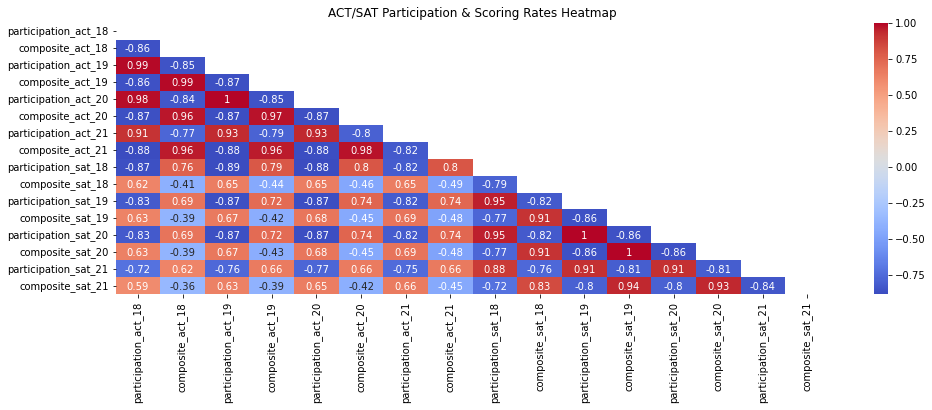

In [96]:
plt.figure(figsize=(16,5))
plt.title('ACT/SAT Participation & Scoring Rates Heatmap')
sns.heatmap(act_sat_scores.corr(), cmap='coolwarm', annot=True,  mask=mask)
plt.show()

The top three strongest areas of positive correlation are between composite scores and participation percentage rates of the SAT of 2019 and 2020, and participation rate of the ACT in 2019 and 2020. 

In [97]:
# Starter code found through prior GA student's repos - given by GA

def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (15, 10) )
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('Number of States', fontsize = 10)

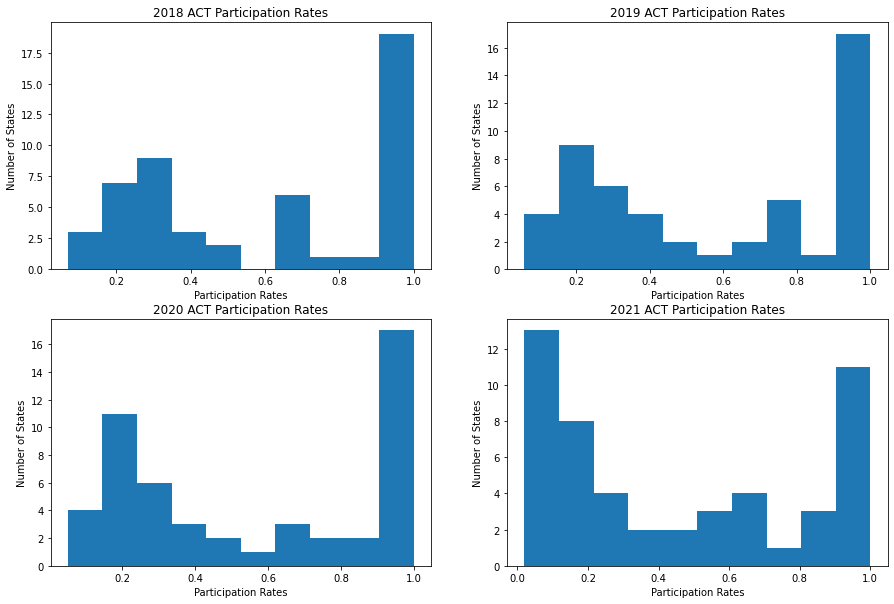

In [98]:
list_of_columns =['participation_act_18', 'participation_act_19', 'participation_act_20','participation_act_21']

list_of_titles = ['2018 ACT Participation Rates', '2019 ACT Participation Rates', 
                  '2020 ACT Participation Rates', '2021 ACT Participation Rates']

list_of_xlabels = ['Participation Rates','Participation Rates', 'Participation Rates',
                   'Participation Rates']

subplot_histograms(act_scores, list_of_columns, list_of_titles, list_of_xlabels);

The participation rates for the ACT from 2018-2020 remained consistent with a mode towards 100% participation; however, 2021 saw a bimodal distribution with the significant cluster of states having below a 20% participation rate.

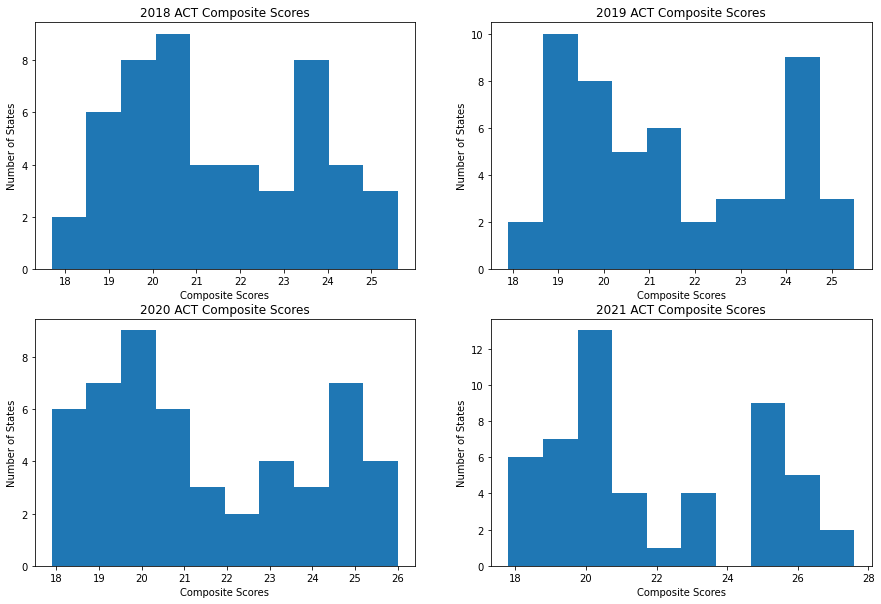

In [99]:
list_of_columns =['composite_act_18', 'composite_act_19', 'composite_act_20','composite_act_21']

list_of_titles = ['2018 ACT Composite Scores', '2019 ACT Composite Scores', 
                  '2020 ACT Composite Scores', '2021 ACT Composite Scores']

list_of_xlabels = ['Composite Scores', 'Composite Scores', 'Composite Scores',
                   'Composite Scores']

subplot_histograms(act_scores, list_of_columns, list_of_titles, list_of_xlabels);

The ACT composite scores had a bimodal pattern with a dip in the middle of histogram. An interesting point worth noting is how the x & y values grew in 2021 possibly indicating the gap of achievement widening. 

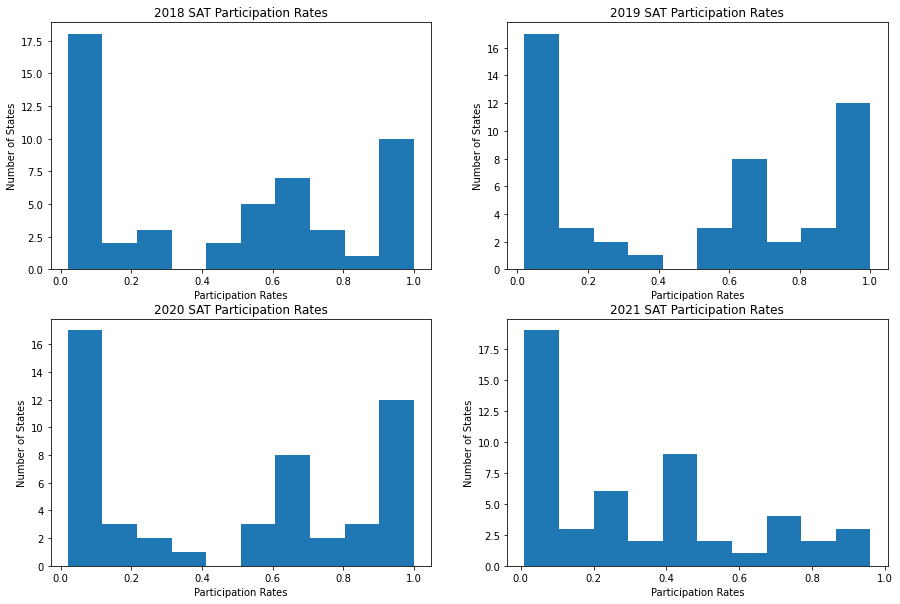

In [100]:
list_of_columns =['participation_sat_18', 'participation_sat_19', 'participation_sat_20','participation_sat_21']

list_of_titles = ['2018 SAT Participation Rates', '2019 SAT Participation Rates', 
                  '2020 SAT Participation Rates', '2021 SAT Participation Rates']

list_of_xlabels = ['Participation Rates','Participation Rates', 'Participation Rates',
                   'Participation Rates']

subplot_histograms(sat_scores, list_of_columns, list_of_titles, list_of_xlabels);

The participation rates for the SAT had an inverse relationship to the participation rates of the ACT because the majority of states had below a 20% participation rate. Furthermore, the participation rates followed a bimodal pattern except for in 2021 which saw a steep majority not participating in the SAT.   

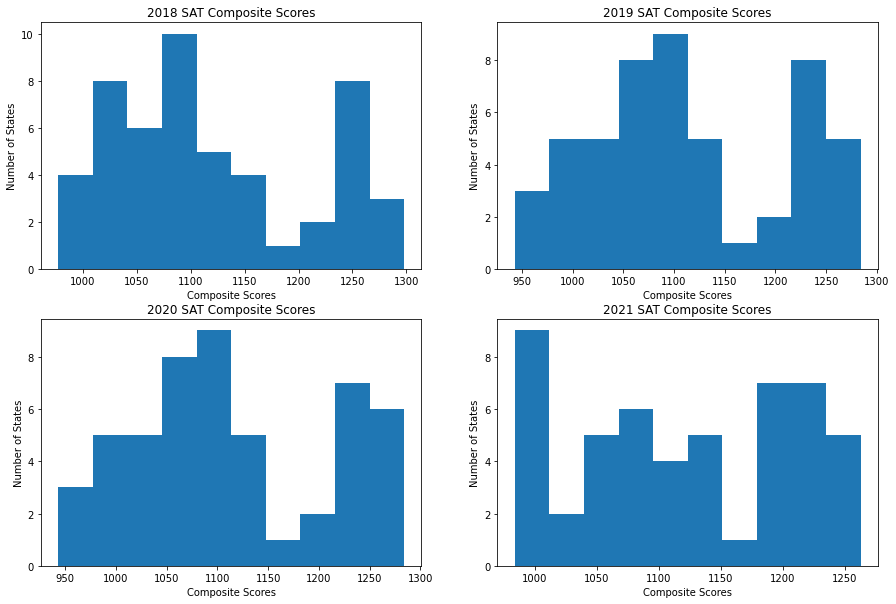

In [101]:
list_of_columns =['composite_sat_18', 'composite_sat_19', 'composite_sat_20','composite_sat_21']

list_of_titles = ['2018 SAT Composite Scores', '2019 SAT Composite Scores', 
                  '2020 SAT Composite Scores', '2021 SAT Composite Scores']

list_of_xlabels = ['Composite Scores', 'Composite Scores', 'Composite Scores',
                   'Composite Scores']

subplot_histograms(sat_scores, list_of_columns, list_of_titles, list_of_xlabels);

The SAT composite scores are interesting to compare especially from 2018-2020 as there's almost a cookie cutter pattern from around 1125 to 1225. Then again as with the other groups of subplots we have examined 2021 shows a break in the pattern with over 9 states getting a composite score of around 1000.

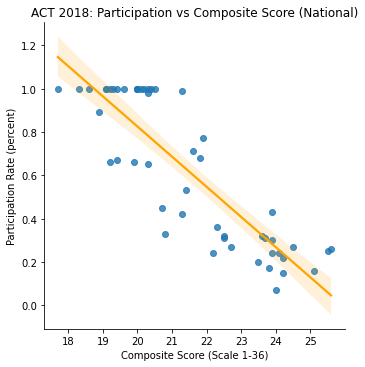

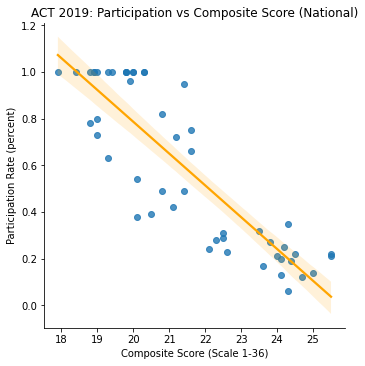

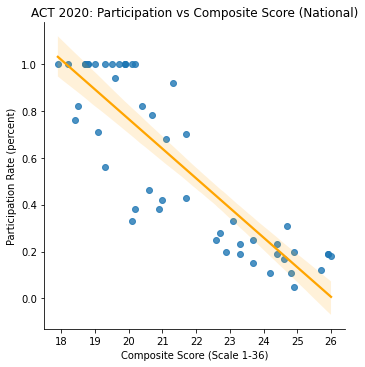

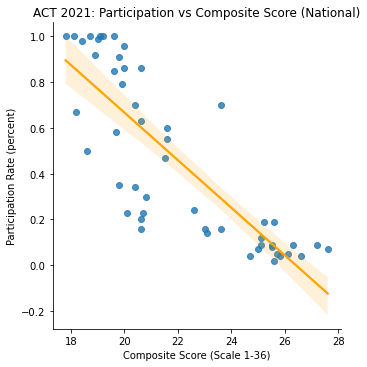

In [102]:
sns.lmplot(data = act_scores,
            y = 'participation_act_18', 
            x = 'composite_act_18',
            line_kws = {'color':'orange'}
            ).set(title = 'ACT 2018: Participation vs Composite Score (National)', 
                                       ylabel = 'Participation Rate (percent)', 
                                       xlabel = 'Composite Score (Scale 1-36)'); 
sns.lmplot(data = act_scores,
            y = 'participation_act_19', 
            x = 'composite_act_19',
            line_kws = {'color':'orange'}
            ).set(title = 'ACT 2019: Participation vs Composite Score (National)', 
                                       ylabel = 'Participation Rate (percent)', 
                                       xlabel = 'Composite Score (Scale 1-36)');
sns.lmplot(data = act_scores,
            y = 'participation_act_20', 
            x = 'composite_act_20',
            line_kws = {'color':'orange'}
            ).set(title = 'ACT 2020: Participation vs Composite Score (National)', 
                                       ylabel = 'Participation Rate (percent)', 
                                       xlabel = 'Composite Score (Scale 1-36)');
sns.lmplot(data = act_scores,
            y = 'participation_act_21', 
            x = 'composite_act_21',
            line_kws = {'color':'orange'}
            ).set(title = 'ACT 2021: Participation vs Composite Score (National)', 
                                       ylabel = 'Participation Rate (percent)', 
                                       xlabel = 'Composite Score (Scale 1-36)');

Participation and composite score for both the ACT and SAT across all years have a consistent pattern of being negatively correlated. I believe the reason may be because requirement alone doesn't always equate to a better score. I think more often than not those students who score higher often have the resources at their disposal e.g. test prep, logistical help and wish to use these high scores as a means of standing out in college applications.    

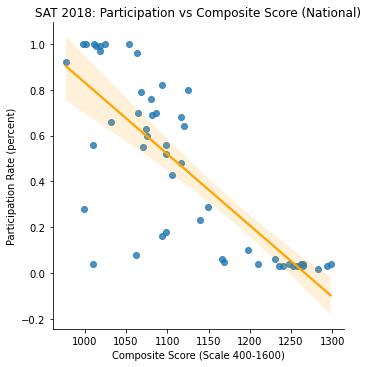

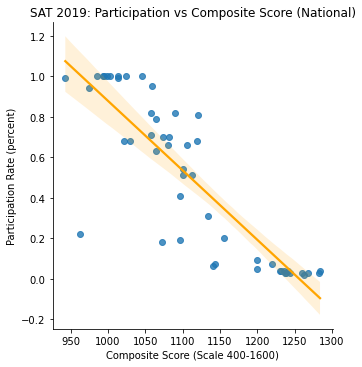

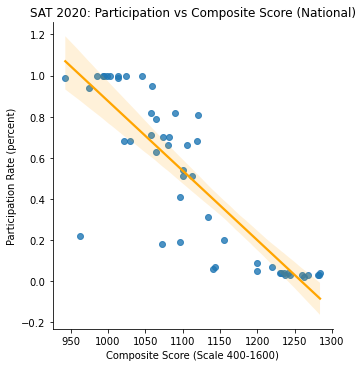

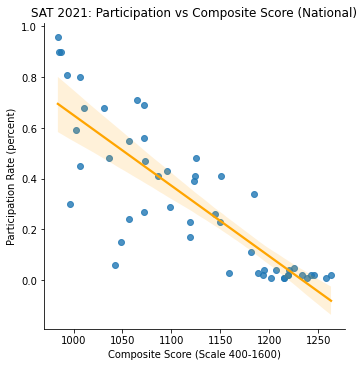

In [104]:
sns.lmplot(data = sat_scores,
            y = 'participation_sat_18', 
            x = 'composite_sat_18',
            line_kws = {'color':'orange'}
            ).set(title = 'SAT 2018: Participation vs Composite Score (National)', 
                                       ylabel = 'Participation Rate (percent)', 
                                       xlabel = 'Composite Score (Scale 400-1600)');
sns.lmplot(data = sat_scores,
            y = 'participation_sat_19', 
            x = 'composite_sat_19',
            line_kws = {'color':'orange'}
            ).set(title = 'SAT 2019: Participation vs Composite Score (National)', 
                                       ylabel = 'Participation Rate (percent)', 
                                       xlabel = 'Composite Score (Scale 400-1600)');
sns.lmplot(data = sat_scores,
            y = 'participation_sat_20', 
            x = 'composite_sat_20',
            line_kws = {'color':'orange'}
            ).set(title = 'SAT 2020: Participation vs Composite Score (National)', 
                                       ylabel = 'Participation Rate (percent)', 
                                       xlabel = 'Composite Score (Scale 400-1600)');
sns.lmplot(data = sat_scores,
            y = 'participation_sat_21', 
            x = 'composite_sat_21',
            line_kws = {'color':'orange'}
            ).set(title = 'SAT 2021: Participation vs Composite Score (National)', 
                                       ylabel = 'Participation Rate (percent)', 
                                       xlabel = 'Composite Score (Scale 400-1600)');

Participation and composite score for both the ACT and SAT across all years have a consistent pattern of being negatively correlated. However, the 2021 correlation appears to be evening out moreso than all other years across both tests. I believe the reason may be because requirement alone doesn't always equate to a better score. I think more often than not those students who score higher often have the resources at their disposal e.g. test prep, logistical help and wish to use these high scores as a means of standing out in college applications.

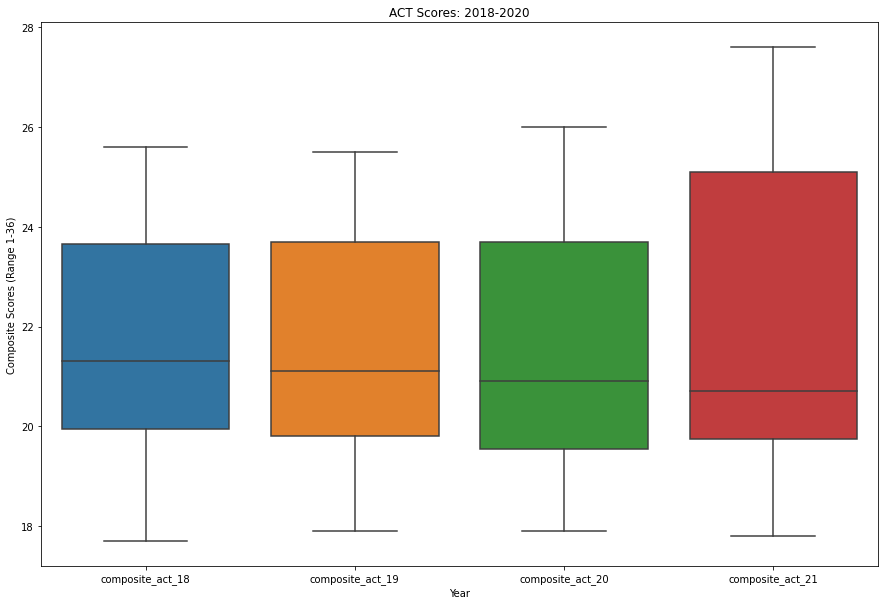

In [107]:
ax = plt.subplots(figsize=(15, 10))
plt.title('ACT Scores: 2018-2020')
plt.xlabel('Year')
plt.ylabel('Composite Scores (Range 1-36)')
sns.boxplot(data = act_scores[['composite_act_18', 'composite_act_19', 'composite_act_20', 'composite_act_21'
]]);

There is relatively no change in the national average. However, the range of minimum and maximum scores are beginning to drift away from one another with the percent of increase between scores in 2021 being around 36%.

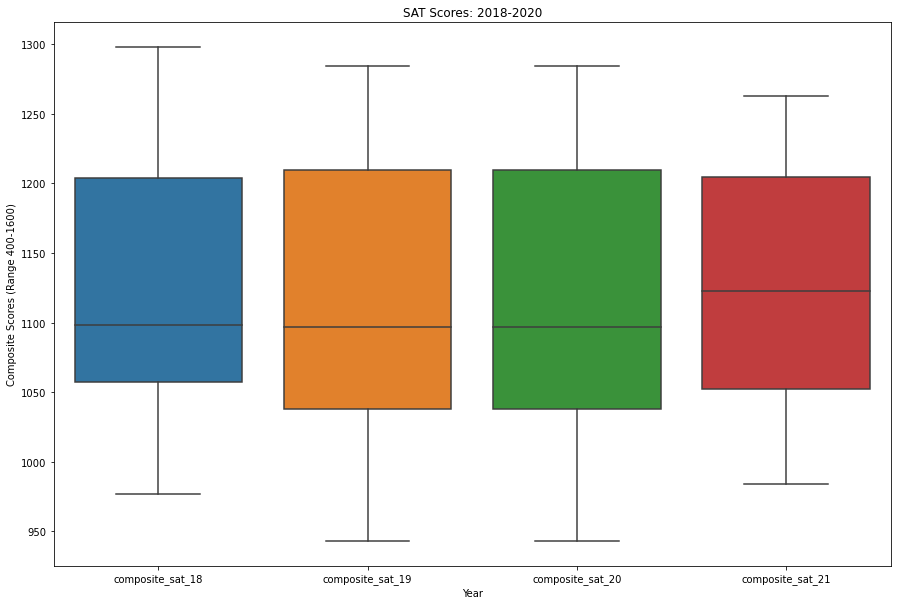

In [105]:
ax = plt.subplots(figsize=(15, 10))
plt.title('SAT Scores: 2018-2020')
plt.xlabel('Year')
plt.ylabel('Composite Scores (Range 400-1600)')
sns.boxplot(data = sat_scores[['composite_sat_18', 'composite_sat_19', 'composite_sat_20', 'composite_sat_21'
]]);

The range of SAT scores has no significant disruption; however, the percent of increase between max & min scores shows growth from 2018 on.

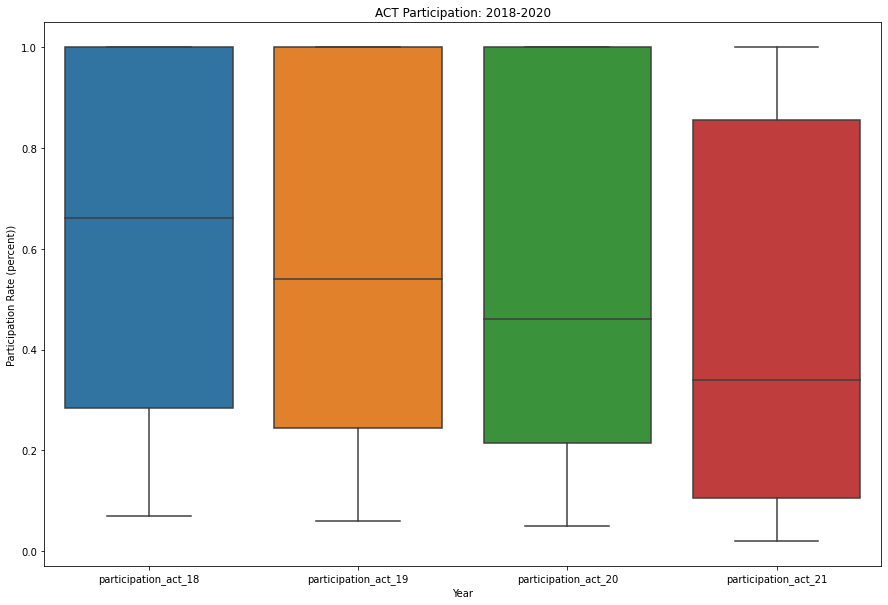

In [108]:
ax = plt.subplots(figsize=(15, 10))
plt.title('ACT Participation: 2018-2020')
plt.xlabel('Year')
plt.ylabel('Participation Rate (percent))')
sns.boxplot(data = act_scores[['participation_act_18', 'participation_act_19', 'participation_act_20', 'participation_act_21'
]]);

The consistent downward trend of participation rate is apparent with 2021 showing the biggest break in this pattern. 

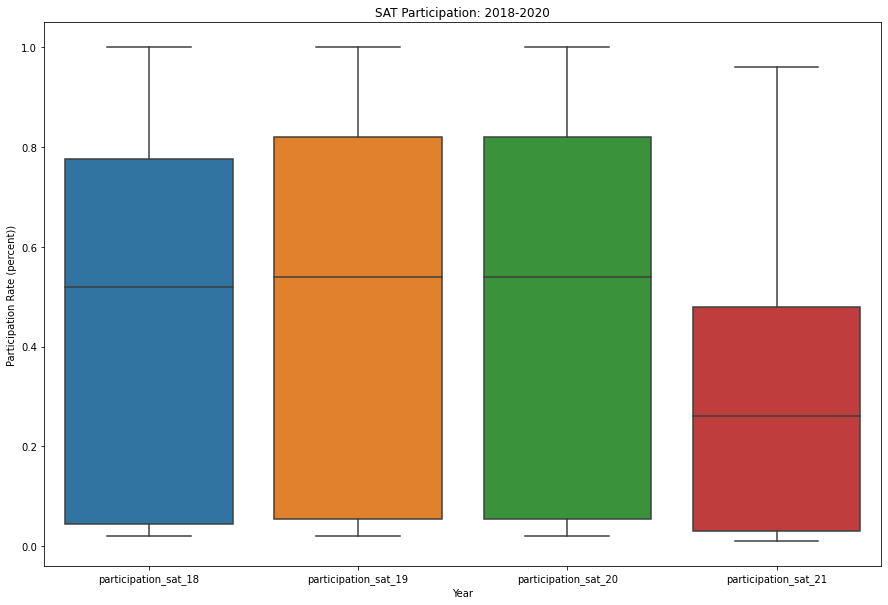

In [109]:
ax = plt.subplots(figsize=(15, 10))
plt.title('SAT Participation: 2018-2020')
plt.xlabel('Year')
plt.ylabel('Participation Rate (percent))')
sns.boxplot(data = sat_scores[['participation_sat_18', 'participation_sat_19', 'participation_sat_20', 'participation_sat_21'
]]);

Virtually identical box and whisker plots between 2018 and 2020. A swift break in the pattern for 2021. 

## Conclusions, Key Takeaways, and Recommendations:

   When doing a deep dive into the data, I didn’t see a shocking drop of the national mean scores for the ACT or SAT; however, the mean participation percentage rate of both saw a significant 15% drop from 2018-2021. In addition, the median participation rate got cut nearly in half.
   
   The next step I took in my analysis was zooming in on state level metrics for patterns. Not surprisingly, the states which took favor with a certain test often had a lower participation rate of the other. Interestingly, when looking at both standardized tests there was a distinct negative correlation between states with the lowest participation rates testing above the national average and vice versa. 

   My problem statement focused on the impact COVID-19 had on testing metrics for the ACT and SAT. From my analysis, I think the pandemic has shown an impact on the most crucial means of getting this data - participation. I conclude both metrics were disrupted slightly due to the pandemic with participation seeing a greater change overall; however, the shifts in achievement were not quite as dramatic as I initially thought. Some of my key takeaways include: the pandemics impact on participation with both tests seeing a 15% drop overall from 2018-2021. Also, the percent of increase trend we are seeing in the composite ACT scores nationally. Finally, the negative correlation which exists across all four years and with both standardized tests. 
   
   Although the data now is only showing a slight shift in patterns, I don’t believe we can truly know the ripple effect of this ongoing pandemic until elementary students of the pandemic begin taking the ACT/SAT 10-12 years from now. As I mentioned previously about the resilience of the human spirit though, these past two years have shown how well students and teachers alike are able to adapt and be resourceful in order to overcome adversity. COVID-19 has halted our usual patterns and has truly shown a light on the trends of inequities in this country. We must reevaluate institutions like education to see how we can begin to reverse the trends. We still have time, we must learn to prioritize these disparities. 
   
   Thankfully, we have the power of technology which in conjunction with our ability to adapt has allowed us to transform the workplace environment - now why can’t similar steps be taken to tackle the disparity we see in higher education related to standardized testing preparation and logistics. 
   
   My recommendations are to work with third party platforms such as Khan Academy <a href="https://www.khanacademy.org/test-prep">(source)</a> or Kumon <a href="https://www.kumon.com/resources/5-easy-tips-to-prepare-for-standardized-testing-season/">(source)</a> to provide students with preparation and test taking logistical help. Also, I think a focus on policy decisions related to funding STEM programs across ALL schools is crucial to closing those achievement gaps we are seeing. Next, take some time to appreciate the educators who rose to the occasion and the students who choose to continue forward even if the path is treacherous and unclear.  Finally, focus on the positive ways in which technology has helped immensely in allowing students to continue to be educated even through the pandemic because celebrating victories matters <a href="http://zoom.us">(Zoom for the win)</a>.